# Práctica 2 Reconocimiento de Formas: Clasificador de la distancia euclídea

* **Alumno 1**: Javier Barragán Haro
* **Alumno 2**: Victor Nieves Sanchez


In [1]:
import numpy as np
from abc import abstractmethod

class Classifier:

    @abstractmethod
    def fit(self,X,y):
        pass

    @abstractmethod
    def predict(self,X):
        pass


class ClassifEuclid(Classifier):
    def __init__(self, labels=[]):
        """Constructor de la clase
        labels: lista de etiquetas de esta clase"""
        self.labels = labels
        self.centroids = []
        pass

    def fit(self, x, y):
        """Entrena el clasificador
        X: matriz numpy cada fila es un dato, cada columna una medida
        y: vector de etiquetas, tantos elementos como filas en X
        retorna objeto clasificador"""
        self.centroids = np.array([np.mean(x[y==i], axis=0) for i in np.unique(y)])
        return self

    def predict(self, x):
        """Estima el grado de pertenencia de cada dato a todas las clases
        X: matriz numpy cada fila es un dato, cada columna una medida del vector de caracteristicas.
        Retorna una matriz, con tantas filas como datos y tantas columnas como clases tenga
        el problema, cada fila almacena los valores pertenencia de un dato a cada clase"""
        return np.linalg.norm(self.centroids[:, np.newaxis] - x, axis=2)

    def pred_label(self, x):
        """Estima la etiqueta de cada dato. La etiqueta puede ser un entero o bien un string.
        X: matriz numpy cada fila es un dato, cada columna una medida
        retorna un vector con las etiquetas de cada dato"""
        return np.argmin(x,axis=0)

    def num_aciertos(self, x, y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        same_values = []
        [same_values.append(x[i] == y[i]) for i in range(0, len(self.labels))]
        number = same_values.count(True)

        return number, (number / len(x)) * 100

## MNIST Database (Modified National Institute of Standards and Technology database)
MNIST es una base de datos de texto manuscrito, que se usa de forma clásica para entrenar sistemas de procesado de imágenes. En esta práctica debes tratar de predecir el dígito de cada imagen.

In [2]:
# # Loading MNIST from Drive
# from google.colab import drive
# from sklearn.datasets import load_iris

# drive.mount('/content/gdrive')
# drive_dir = '/content/gdrive/My Drive/Colab Notebooks/MNIST/'

# # Isntall idx2numpy to read the data
# !pip install idx2numpy 
# import idx2numpy
# import numpy as np

# # Load the images
# file = drive_dir + 'train-images-idx3-ubyte/data'
# X = idx2numpy.convert_from_file(file)

# # Reshape the data. Each pixel is considered as a feature. 28 x 28 = 784
# X = X.reshape(X.shape[0], -1)
# print("X: \n" + str(X))

# # Load the labels
# file = drive_dir + 'train-labels-idx1-ubyte/data'
# y = idx2numpy.convert_from_file(file)

# print("y: \n" + str(y))


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

# Cargamos MNIST desde internet ( https://www.openml.org/d/554 )
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000]
print("X: \n" + str(X))
print("y: \n" + str(y))


X: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y: 
['5' '0' '4' ... '5' '6' '8']


Label: 5


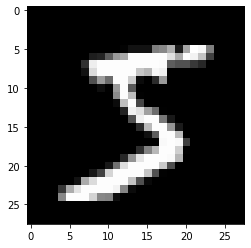

In [5]:
# Vamos a visualizar alguna de las imágenes de la BD de MNIST
import matplotlib.pyplot as plt

# Imprimamos el primer ejemplo
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("Label: " + str(y[0]))

Ahora usamos nuestro clasificador de la distancia euclídea para predecir la base de datos:

In [6]:
# ------ MNIST Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000].astype(int)

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(y)
classifEuclid.fit(X, y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)

correct = classifEuclid.num_aciertos(labels_matrix, list(y))
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Correct answers: 48479 / 60000
Success rate: 80.79833333333333


## Isolet Dataset (Isolated Letter Speech Recognition)
Tratar de predecir ahora esta otra base de datos sobre reconociento de voz.

In [7]:
import pandas as pd

# ------ Isolet Database ------
# 1. Cargar los datos de la base de datos de entrenamiento
X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y = pd.factorize(y)[0]

# 2. Entrenar el clasificador
classifEuclid = ClassifEuclid(y)
classifEuclid.fit(X, y)

# 3. Predecir empleando la base de datos de entrenamiento (X)
predict_matrix = classifEuclid.predict(X)

# 4. Evaluar el clasificador calculando el porcentaje de datos correctamente clasificados
labels_matrix = classifEuclid.pred_label(predict_matrix)
correct = classifEuclid.num_aciertos(labels_matrix, y)
print("Correct answers:", correct[0], "/", len(y))
print("Success rate:", correct[1])

Correct answers: 6843 / 7797
Success rate: 87.7645248172374


## Iris, Wine y Cancer Dataset


In [8]:
# --------- Iris database ---------
from sklearn.datasets import load_iris

dataset = load_iris()
samples = dataset.data
labels = dataset.target

classifEuclid = ClassifEuclid(labels)

classifEuclid.fit(samples, labels)

predict_matrix = classifEuclid.predict(samples)

labels_matrix = classifEuclid.pred_label(predict_matrix)

correct = classifEuclid.num_aciertos(labels_matrix, labels)

print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Correct answers: 139 / 150
Success rate: 92.66666666666666


In [9]:
# --------- Wine database ---------
from sklearn.datasets import load_wine

dataset = load_wine()
samples = dataset.data
labels = dataset.target

classifEuclid = ClassifEuclid(labels)

classifEuclid.fit(samples, labels)

predict_matrix = classifEuclid.predict(samples)

labels_matrix = classifEuclid.pred_label(predict_matrix)

correct = classifEuclid.num_aciertos(labels_matrix, labels)

print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Correct answers: 129 / 178
Success rate: 72.47191011235955


In [10]:
# --------- Cancer database ---------
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
samples = dataset.data
labels = dataset.target

classifEuclid = ClassifEuclid(labels)

classifEuclid.fit(samples, labels)

predict_matrix = classifEuclid.predict(samples)

labels_matrix = classifEuclid.pred_label(predict_matrix)

correct = classifEuclid.num_aciertos(labels_matrix, labels)

print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

Correct answers: 507 / 569
Success rate: 89.103690685413


Resultados de los tres experimentos:

| Base de datos | Número de aciertos | Porcentaje de aciertos |
| --- | --- | --- |
| Iris   |  139 / 150 | 92.66 |
| Wine   | 129/178 | 72.47  |
| Cancer | 507/569 | 89.10 |
| **MNIST**  | 48479 / 60000 |80.80|
| **Isolet** | 6843 / 7797 | 87.76 |